# Comparison of different Dimension Reduction Methods

## Import needed packages

In [1]:
import torchvision
from matplotlib import pyplot as plt
import copy 
import numpy as np
import dask.array as da

import torchvision
from matplotlib import pyplot as plt
import copy 
import numpy as np
import dask.array as da
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from tqdm import tqdm
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

from sklearn.manifold import TSNE
import umap

## Install missing packages

In [5]:
!pip install -q trimap ivis[gpu] cvae

## Get the dataset (MNIST or FashionMNIST)

In [2]:
ds = torchvision.datasets.FashionMNIST('./ds_root',download=True)

print(f"Shape of the dataset: {ds.data.shape}")

Shape of the dataset: torch.Size([60000, 28, 28])


## Reshape (flatten) and scale the dataset

In [3]:
x_flattend = np.reshape(ds.data,(len(ds.data),-1))
#x_flattend = np.asarray(x_flattend)

# we fit a standard scaler and save it for inverse transformation later
scaler = StandardScaler().fit(x_flattend)
x_scaled = scaler.transform(x_flattend)

print(f"Shape of the dataset: {x_scaled.shape}")
print(f"Min and Max values of the original datset: min = {x_flattend.min()} / max = {x_flattend.max()}")
print(f"Min and Max values of the scaled datset: min = {x_scaled.min()} / max = {x_scaled.max()}")

Shape of the dataset: (60000, 784)
Min and Max values of the original datset: min = 0 / max = 255
Min and Max values of the scaled datset: min = -2.410065222002384 / max = 185.47759551478546


## PCA

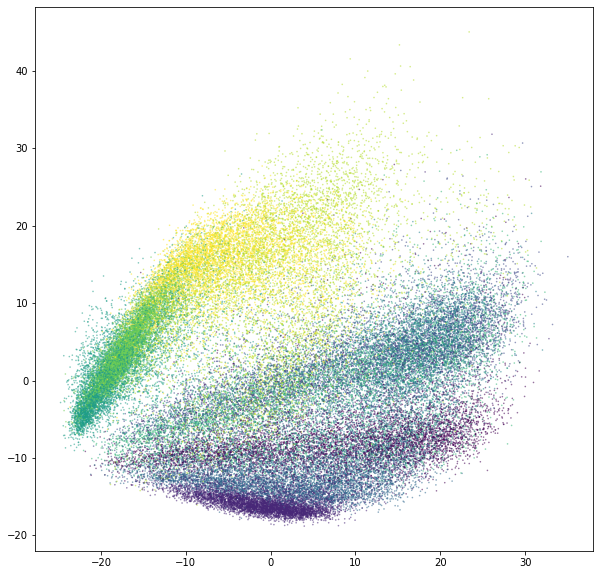

In [11]:
z_pca = PCA(n_components=2).fit_transform(x_scaled)
z_pca_1, z_pca_2 = np.split(z_pca,[-1],axis=1)
plt.figure(figsize=(10,10))
plt.scatter(z_pca_1,z_pca_2,c=ds.targets[:],s=0.4,alpha=0.5);

# tSNE

In [6]:
# CAUTION: tSNE takes a very long time to perform the dimensional reduction

# z_tsne = TSNE(n_components=2, learning_rate='auto', init='random').fit_transform(x_scaled)
# z_tsne_1, z_tsne_2 = np.split(z_tsne,[-1],axis=1)
# plt.figure(figsize=(10,10))
# plt.scatter(z_tsne_1,z_tsne_2,c=ds.targets[:],s=0.4,alpha=0.5);

# UMAP

UMAP(n_neighbors=30, verbose=True)
Wed Apr  6 11:36:49 2022 Construct fuzzy simplicial set


/usr/local/lib/python3.7/dist-packages/numba/np/ufunc/parallel.py:363: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 9107. The TBB threading layer is disabled.
  warnings.warn(problem)


Wed Apr  6 11:36:49 2022 Finding Nearest Neighbors
Wed Apr  6 11:36:49 2022 Building RP forest with 17 trees
Wed Apr  6 11:36:57 2022 NN descent for 16 iterations
	 1  /  16
	 2  /  16
	 3  /  16
	Stopping threshold met -- exiting after 3 iterations
Wed Apr  6 11:37:34 2022 Finished Nearest Neighbor Search
Wed Apr  6 11:37:38 2022 Construct embedding


Epochs completed:   0%|            0/200 [00:00]

Wed Apr  6 11:39:31 2022 Finished embedding


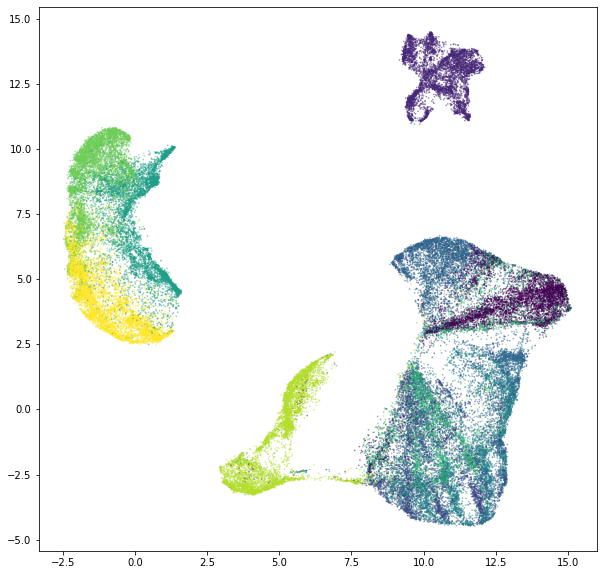

In [4]:
z_umap = umap.UMAP(verbose=True,n_neighbors=30).fit_transform(x_flattend)
z_umap_1, z_umap_2 = np.split(z_umap,[-1],axis=1)
plt.figure(figsize=(10,10))
plt.scatter(z_umap_1,z_umap_2,c=ds.targets[:],s=0.4,alpha=0.5);

# CVAE

In [7]:
from cvae import cvae
embedder = cvae.CompressionVAE(x_scaled)
embedder.train()

Total amount of data:  54000
Input feature dimension:  784
Calculating normalisation factors.
Normalisation factors calculated.
Total amount of data:  6000
Creating model.
Model created.
Setting up loss.
Loss set up.
Setting up session.
Session set up.
Trying to restore saved checkpoints from /content/temp ... No checkpoint found.
No model found to restore. Initialising new model.
Starting queues.
Reader threads started.
step 0; epoch 0.00 - loss = 381.555, test_loss = 341.244, lr = 0.00100, (0.058 sec/step)
Storing checkpoint to /content/temp ... Done.
step 50; epoch 0.06 - loss = 275.433, test_loss = 250.357, lr = 0.00100, (0.032 sec/step)
step 100; epoch 0.12 - loss = 306.145, test_loss = 207.324, lr = 0.00100, (0.031 sec/step)
step 150; epoch 0.18 - loss = 211.192, test_loss = 182.540, lr = 0.00100, (0.031 sec/step)
step 200; epoch 0.24 - loss = 258.342, test_loss = 173.420, lr = 0.00100, (0.030 sec/step)
step 250; epoch 0.30 - loss = 233.740, test_loss = 166.996, lr = 0.00100, (0.

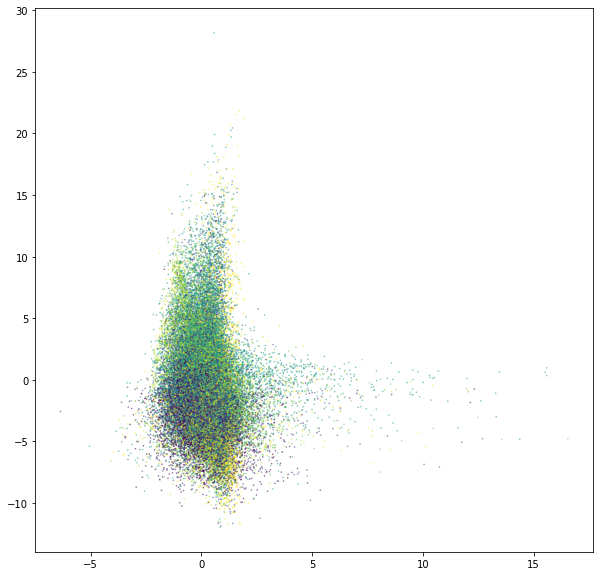

In [10]:
z_cvae = embedder.embed(np.asarray(x_flattend))
z_cvae_1, z_cvae_2 = np.split(z_cvae,[-1],axis=1)
plt.figure(figsize=(10,10))
plt.scatter(z_cvae_1,z_cvae_2,c=ds.targets[:],s=0.4,alpha=0.5);

# TRIMAP

TRIMAP(n_inliers=12, n_outliers=4, n_random=3, distance=euclidean, weight_temp=0.5, lr=0.1, n_iters=400, apply_pca=True, opt_method=dbd, verbose=True, return_seq=False)
running TriMap on 60000 points with dimension 784
pre-processing
applied PCA
found nearest neighbors
sampled triplets
running TriMap with dbd
Iteration:  100 /  400, Loss: 0.201, Violated triplets: 1.5061
Iteration:  200 /  400, Loss: 0.185, Violated triplets: 1.5308
Iteration:  300 /  400, Loss: 0.174, Violated triplets: 1.5629
Iteration:  400 /  400, Loss: 0.167, Violated triplets: 1.5846
Elapsed time: 0:01:34.471864


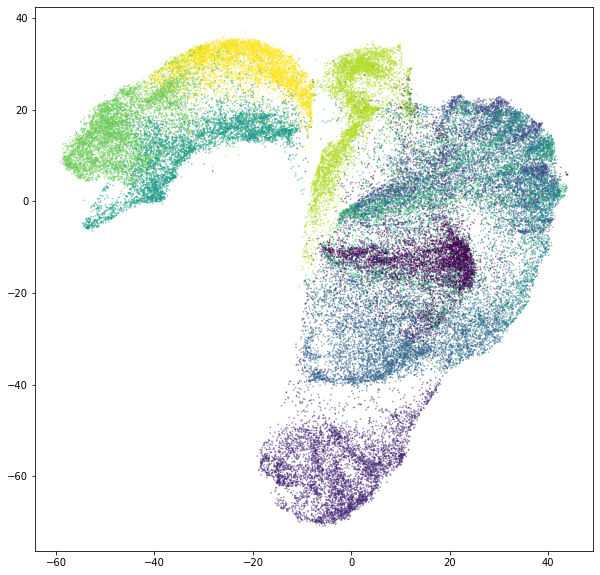

In [13]:
import trimap
z_trimap = trimap.TRIMAP(verbose=True,n_iters=400).fit_transform(x_scaled)
z_trimap_1, z_trimap_2 = np.split(z_trimap,[-1],axis=1)
plt.figure(figsize=(10,10))
plt.scatter(z_trimap_1,z_trimap_2,c=ds.targets[:],s=0.4,alpha=0.5);

# IVIS

Building KNN index


100%|██████████| 60000/60000 [00:18<00:00, 3309.88it/s]


Extracting KNN neighbours


100%|██████████| 60000/60000 [00:59<00:00, 1012.42it/s]


Training neural network
Epoch 1/1000
469/469 [==============================] - 11s 23ms/step - loss: 0.0990
Epoch 2/1000
469/469 [==============================] - 9s 19ms/step - loss: 0.0659
Epoch 3/1000
469/469 [==============================] - 9s 19ms/step - loss: 0.0612
Epoch 4/1000
469/469 [==============================] - 9s 19ms/step - loss: 0.0547
Epoch 5/1000
469/469 [==============================] - 9s 19ms/step - loss: 0.0507
Epoch 6/1000
469/469 [==============================] - 9s 19ms/step - loss: 0.0490
Epoch 7/1000
469/469 [==============================] - 9s 19ms/step - loss: 0.0471
Epoch 8/1000
469/469 [==============================] - 9s 18ms/step - loss: 0.0462
Epoch 9/1000
469/469 [==============================] - 9s 18ms/step - loss: 0.0478
Epoch 10/1000
469/469 [==============================] - 9s 19ms/step - loss: 0.0475
Epoch 11/1000
469/469 [==============================] - 9s 19ms/step - loss: 0.0474
Epoch 12/1000
469/469 [==========================

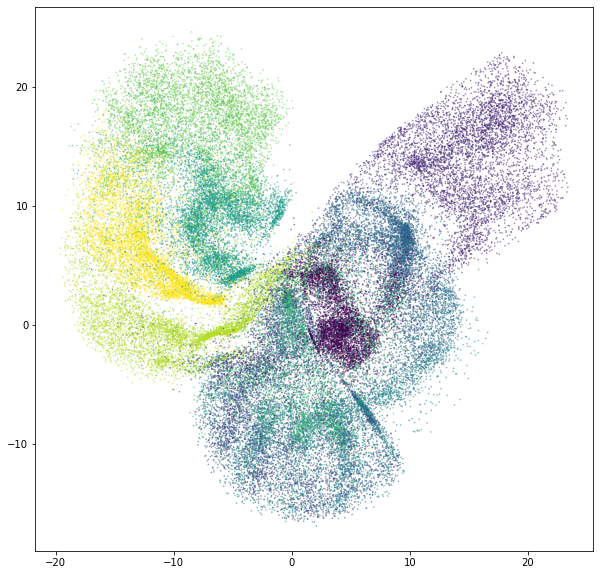

In [11]:
from ivis import Ivis
model = Ivis(embedding_dims=2, k=75)
z_ivis = model.fit_transform(x_scaled)
z_ivis_1, z_ivis_2 = np.split(z_ivis,[-1],axis=1)
plt.figure(figsize=(10,10))
plt.scatter(z_ivis_1,z_ivis_2,c=ds.targets[:],s=0.4,alpha=0.5);